In [49]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import pygenesys as pg
from plotter import *
import seaborn as sb
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = (12,12)

In [2]:
def get_objective(conn):
    """
    Retrieves the objective function
    """
    cursor = conn.cursor()
    command = "SELECT * FROM Output_Objective"
    cursor.execute(command)
    obj_value = cursor.fetchall()[0][-1]
    
    return obj_value

In [3]:
sim_path = "/home/sdotson/research/benchmark/data/IL_uniform_lifespan_365.sqlite"
conn = sqlite3.connect(sim_path)
cursor = conn.cursor()

In [7]:
command = "SELECT tech, capacity FROM Output_CapacityByPeriodAndTech WHERE scenario IS 'uniform_lifespan_MGA'"
data = cursor.execute(command)
display(data.description)
cursor.fetchall()

(('tech', None, None, None, None, None, None),
 ('capacity', None, None, None, None, None, None))

[('NATGAS_CONV', 8375.1331),
 ('NUCLEAR_CONV', 18609.404),
 ('TRANSMISSION', 29251.354),
 ('LI_BATTERY', 815.34126),
 ('SOLAR_FARM', 2810.3015)]

In [5]:
def get_scenario_list(fname):
    """
    Returns list of scenario names
    """
    
    conn = sqlite3.connect(fname)
    cursor = conn.cursor()
    command = "SELECT scenario FROM Output_Objective"
    metadata = cursor.execute(command)
    scenarios = [i[0] for i in cursor.fetchall()]
        
    return scenarios

In [6]:
sc = get_scenario_list(sim_path)
sc

['uniform_lifespan_MGA',
 'uniform_lifespan_MGA_mga_0',
 'uniform_lifespan_MGA_mga_1',
 'uniform_lifespan_MGA_mga_2',
 'uniform_lifespan_MGA_mga_3',
 'uniform_lifespan_MGA_mga_4',
 'uniform_lifespan_MGA_mga_5',
 'uniform_lifespan_MGA_mga_6',
 'uniform_lifespan_MGA_mga_7',
 'uniform_lifespan_MGA_mga_8',
 'uniform_lifespan_MGA_mga_9',
 'uniform_lifespan_MGA_mga_10',
 'uniform_lifespan_MGA_mga_11',
 'uniform_lifespan_MGA_mga_12',
 'uniform_lifespan_MGA_mga_13',
 'uniform_lifespan_MGA_mga_14',
 'uniform_lifespan_MGA_mga_15',
 'uniform_lifespan_MGA_mga_16',
 'uniform_lifespan_MGA_mga_17',
 'uniform_lifespan_MGA_mga_18',
 'uniform_lifespan_MGA_mga_19',
 'uniform_lifespan_MGA_mga_20',
 'uniform_lifespan_MGA_mga_21',
 'uniform_lifespan_MGA_mga_22',
 'uniform_lifespan_MGA_mga_23',
 'uniform_lifespan_MGA_mga_24',
 'uniform_lifespan_MGA_mga_25',
 'uniform_lifespan_MGA_mga_26',
 'uniform_lifespan_MGA_mga_27',
 'uniform_lifespan_MGA_mga_28',
 'uniform_lifespan_MGA_mga_29']

In [8]:
seasons = get_seasons(conn)
periods = get_periods(conn)
all_techs = get_regional_techs(conn, 'ELC', 'IL')
N_hours = 24

In [9]:
all_techs

array(['BIOMASS', 'COAL_ADV', 'COAL_CONV', 'LI_BATTERY', 'NATGAS_ADV',
       'NATGAS_CONV', 'NUCLEAR_ADV', 'NUCLEAR_CONV', 'SOLAR_FARM',
       'WIND_FARM'], dtype='<U12')

In [98]:
all_techs = ['NUCLEAR_CONV', 'NUCLEAR_ADV', 'NATGAS_CONV', 'NATGAS_ADV', 'COAL_CONV', 'COAL_ADV', 'BIOMASS', 'LI_BATTERY', 'SOLAR_FARM','WIND_FARM']

In [99]:
results = dict(zip(list(all_techs)+['TRANSMISSION','Scenario'], np.zeros((12,31))))

In [100]:
results

{'NUCLEAR_CONV': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'NUCLEAR_ADV': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'NATGAS_CONV': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'NATGAS_ADV': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'COAL_CONV': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'COAL_ADV': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'BIOMASS': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 

In [101]:
results['Scenario'] = list(results['Scenario'])

In [102]:
for i,s in enumerate(sc):
    command = f"SELECT tech, capacity, scenario FROM Output_CapacityByPeriodAndTech WHERE scenario IS '{s}'"
    data = cursor.execute(command)
#     display(data.description)
    data = cursor.fetchall()
    for row in data:
        results[row[0]][i] = row[1]
        results['Scenario'][i] = s

In [103]:
df = pd.DataFrame(results)
df.set_index('Scenario',inplace=True)

In [104]:
df.head()

,NUCLEAR_CONV,NUCLEAR_ADV,NATGAS_CONV,NATGAS_ADV,COAL_CONV,COAL_ADV,BIOMASS,LI_BATTERY,SOLAR_FARM,WIND_FARM,TRANSMISSION
Scenario,,,,,,,,,,,
uniform_lifespan_MGA,18609.404,0.0,8375.1331,0.0000,0.0000,0.0,0.0,815.34126,2810.3015,0.0000,29251.354
uniform_lifespan_MGA_mga_0,10496.362,0.0,5858.3445,0.0000,10588.5020,0.0,0.0,535.69332,3466.3107,0.0000,29251.354
uniform_lifespan_MGA_mga_1,10496.362,0.0,5858.3445,0.0000,10588.5020,0.0,0.0,535.69332,3466.3107,0.0000,29251.354
uniform_lifespan_MGA_mga_2,14995.633,0.0,6417.6017,3137.6616,2392.3113,0.0,0.0,535.69332,3466.3107,0.0000,29251.354
uniform_lifespan_MGA_mga_3,14212.175,0.0,7891.5275,0.0000,3640.5689,0.0,0.0,1353.49110,2612.5889,7029.9092,29251.354


In [105]:
df.iloc[:,:-1].head()

,NUCLEAR_CONV,NUCLEAR_ADV,NATGAS_CONV,NATGAS_ADV,COAL_CONV,COAL_ADV,BIOMASS,LI_BATTERY,SOLAR_FARM,WIND_FARM
Scenario,,,,,,,,,,
uniform_lifespan_MGA,18609.404,0.0,8375.1331,0.0000,0.0000,0.0,0.0,815.34126,2810.3015,0.0000
uniform_lifespan_MGA_mga_0,10496.362,0.0,5858.3445,0.0000,10588.5020,0.0,0.0,535.69332,3466.3107,0.0000
uniform_lifespan_MGA_mga_1,10496.362,0.0,5858.3445,0.0000,10588.5020,0.0,0.0,535.69332,3466.3107,0.0000
uniform_lifespan_MGA_mga_2,14995.633,0.0,6417.6017,3137.6616,2392.3113,0.0,0.0,535.69332,3466.3107,0.0000
uniform_lifespan_MGA_mga_3,14212.175,0.0,7891.5275,0.0000,3640.5689,0.0,0.0,1353.49110,2612.5889,7029.9092


In [124]:
with open("../2023-dotson-prelim/data/2022-11-18-temoa-mga-design.pkl", "wb") as file:
    dill.dump(df.iloc[:,:-1].values/1e3, file)

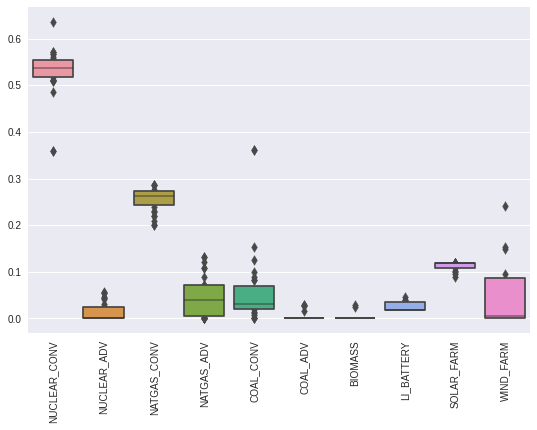

In [122]:
fig, ax = plt.subplots(figsize=(9,6), facecolor='w')
sb.boxenplot(ax=ax, data=df.iloc[:,:-1]/1000/peak_demand)
ax.tick_params(axis='x',rotation=90)

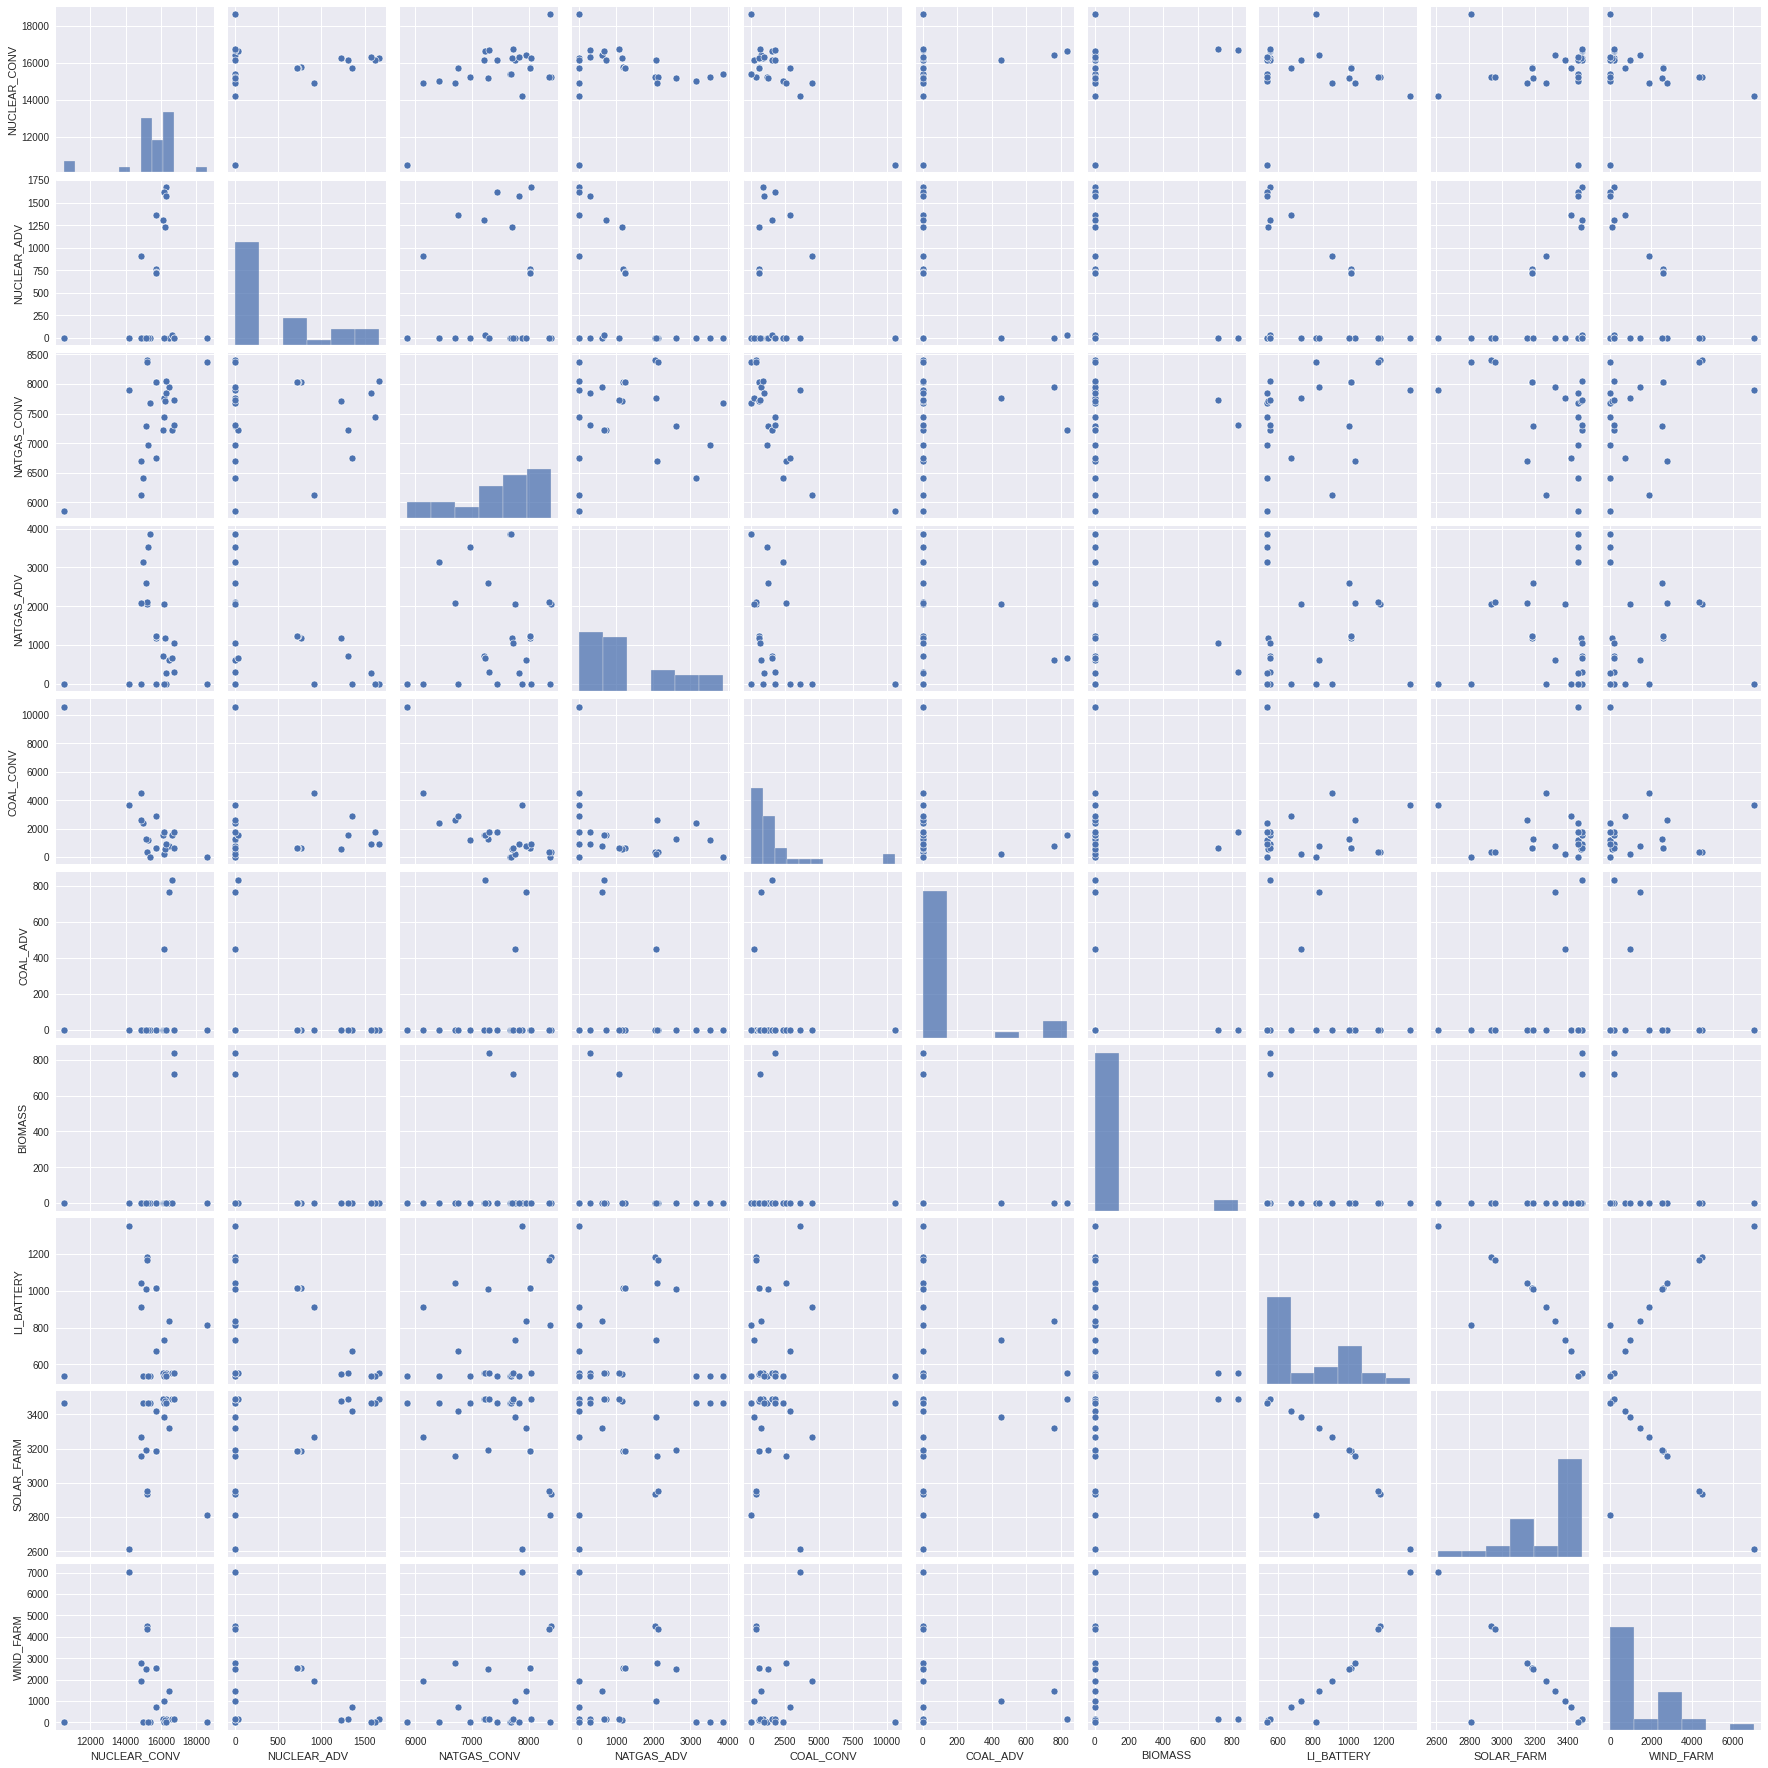

In [123]:
sb.pairplot(data=df.iloc[:,:-1])

In [158]:
outflow = np.zeros((365,24))
for s in range(0,365):
    command = ("SELECT t_day,vflow_out FROM Output_VFlow_Out " 
              "WHERE tech IS 'LI_BATTERY' " 
              "AND scenario IS 'uniform_lifespan_MGA'"
              f"AND t_season IS 'S{s}'")
    data = cursor.execute(command)
#     display(data.description)
#     np.array(cursor.fetchall())
    d = cursor.fetchall()
    display(f"{s}/365")
    outflow[s] = sorted_flow_out(d)
#     display(outflow[s])

'0/365'

'1/365'

'2/365'

'3/365'

'4/365'

'5/365'

'6/365'

'7/365'

'8/365'

'9/365'

'10/365'

'11/365'

'12/365'

'13/365'

'14/365'

'15/365'

'16/365'

'17/365'

'18/365'

'19/365'

'20/365'

'21/365'

'22/365'

'23/365'

'24/365'

'25/365'

'26/365'

'27/365'

'28/365'

'29/365'

'30/365'

'31/365'

'32/365'

'33/365'

'34/365'

'35/365'

'36/365'

'37/365'

'38/365'

'39/365'

'40/365'

'41/365'

'42/365'

'43/365'

'44/365'

'45/365'

'46/365'

'47/365'

'48/365'

'49/365'

'50/365'

'51/365'

'52/365'

'53/365'

'54/365'

'55/365'

'56/365'

'57/365'

'58/365'

'59/365'

'60/365'

'61/365'

'62/365'

'63/365'

'64/365'

'65/365'

'66/365'

'67/365'

'68/365'

'69/365'

'70/365'

'71/365'

'72/365'

'73/365'

'74/365'

'75/365'

'76/365'

'77/365'

'78/365'

'79/365'

'80/365'

'81/365'

'82/365'

'83/365'

'84/365'

'85/365'

'86/365'

'87/365'

'88/365'

'89/365'

'90/365'

'91/365'

'92/365'

'93/365'

'94/365'

'95/365'

'96/365'

'97/365'

'98/365'

'99/365'

'100/365'

'101/365'

'102/365'

'103/365'

'104/365'

'105/365'

'106/365'

'107/365'

'108/365'

'109/365'

'110/365'

'111/365'

'112/365'

'113/365'

'114/365'

'115/365'

'116/365'

'117/365'

'118/365'

'119/365'

'120/365'

'121/365'

'122/365'

'123/365'

'124/365'

'125/365'

'126/365'

'127/365'

'128/365'

'129/365'

'130/365'

'131/365'

'132/365'

'133/365'

'134/365'

'135/365'

'136/365'

'137/365'

'138/365'

'139/365'

'140/365'

'141/365'

'142/365'

'143/365'

'144/365'

'145/365'

'146/365'

'147/365'

'148/365'

'149/365'

'150/365'

'151/365'

'152/365'

'153/365'

'154/365'

'155/365'

'156/365'

'157/365'

'158/365'

'159/365'

'160/365'

'161/365'

'162/365'

'163/365'

'164/365'

'165/365'

'166/365'

'167/365'

'168/365'

'169/365'

'170/365'

'171/365'

'172/365'

'173/365'

'174/365'

'175/365'

'176/365'

'177/365'

'178/365'

'179/365'

'180/365'

'181/365'

'182/365'

'183/365'

'184/365'

'185/365'

'186/365'

'187/365'

'188/365'

'189/365'

'190/365'

'191/365'

'192/365'

'193/365'

'194/365'

'195/365'

'196/365'

'197/365'

'198/365'

'199/365'

'200/365'

'201/365'

'202/365'

'203/365'

'204/365'

'205/365'

'206/365'

'207/365'

'208/365'

'209/365'

'210/365'

'211/365'

'212/365'

'213/365'

'214/365'

'215/365'

'216/365'

'217/365'

'218/365'

'219/365'

'220/365'

'221/365'

'222/365'

'223/365'

'224/365'

'225/365'

'226/365'

'227/365'

'228/365'

'229/365'

'230/365'

'231/365'

'232/365'

'233/365'

'234/365'

'235/365'

'236/365'

'237/365'

'238/365'

'239/365'

'240/365'

'241/365'

'242/365'

'243/365'

'244/365'

'245/365'

'246/365'

'247/365'

'248/365'

'249/365'

'250/365'

'251/365'

'252/365'

'253/365'

'254/365'

'255/365'

'256/365'

'257/365'

'258/365'

'259/365'

'260/365'

'261/365'

'262/365'

'263/365'

'264/365'

'265/365'

'266/365'

'267/365'

'268/365'

'269/365'

'270/365'

'271/365'

'272/365'

'273/365'

'274/365'

'275/365'

'276/365'

'277/365'

'278/365'

'279/365'

'280/365'

'281/365'

'282/365'

'283/365'

'284/365'

'285/365'

'286/365'

'287/365'

'288/365'

'289/365'

'290/365'

'291/365'

'292/365'

'293/365'

'294/365'

'295/365'

'296/365'

'297/365'

'298/365'

'299/365'

'300/365'

'301/365'

'302/365'

'303/365'

'304/365'

'305/365'

'306/365'

'307/365'

'308/365'

'309/365'

'310/365'

'311/365'

'312/365'

'313/365'

'314/365'

'315/365'

'316/365'

'317/365'

'318/365'

'319/365'

'320/365'

'321/365'

'322/365'

'323/365'

'324/365'

'325/365'

'326/365'

'327/365'

'328/365'

'329/365'

'330/365'

'331/365'

'332/365'

'333/365'

'334/365'

'335/365'

'336/365'

'337/365'

'338/365'

'339/365'

'340/365'

'341/365'

'342/365'

'343/365'

'344/365'

'345/365'

'346/365'

'347/365'

'348/365'

'349/365'

'350/365'

'351/365'

'352/365'

'353/365'

'354/365'

'355/365'

'356/365'

'357/365'

'358/365'

'359/365'

'360/365'

'361/365'

'362/365'

'363/365'

'364/365'

In [159]:
inflow = np.zeros((365,24))
for s in range(0,365):
    command = ("SELECT t_day,vflow_in FROM Output_VFlow_In " 
              "WHERE tech IS 'LI_BATTERY' " 
              "AND scenario IS 'uniform_lifespan_MGA'"
              f"AND t_season IS 'S{s+1}'")
    data = cursor.execute(command)

    d = cursor.fetchall()
    display(f"{s+1}/365")
    outflow[s] = sorted_flow_out(d)
#     display(outflow[s])

'1/365'

'2/365'

'3/365'

'4/365'

'5/365'

'6/365'

'7/365'

'8/365'

'9/365'

'10/365'

'11/365'

'12/365'

'13/365'

'14/365'

'15/365'

'16/365'

'17/365'

'18/365'

'19/365'

'20/365'

'21/365'

'22/365'

'23/365'

'24/365'

'25/365'

'26/365'

'27/365'

'28/365'

'29/365'

'30/365'

'31/365'

'32/365'

'33/365'

'34/365'

'35/365'

'36/365'

'37/365'

'38/365'

'39/365'

'40/365'

'41/365'

'42/365'

'43/365'

'44/365'

'45/365'

'46/365'

'47/365'

'48/365'

'49/365'

'50/365'

'51/365'

'52/365'

'53/365'

'54/365'

'55/365'

'56/365'

'57/365'

'58/365'

'59/365'

'60/365'

'61/365'

'62/365'

'63/365'

'64/365'

'65/365'

'66/365'

'67/365'

'68/365'

'69/365'

'70/365'

'71/365'

'72/365'

'73/365'

'74/365'

'75/365'

'76/365'

'77/365'

'78/365'

'79/365'

'80/365'

'81/365'

'82/365'

'83/365'

'84/365'

'85/365'

'86/365'

'87/365'

'88/365'

'89/365'

'90/365'

'91/365'

'92/365'

'93/365'

'94/365'

'95/365'

'96/365'

'97/365'

'98/365'

'99/365'

'100/365'

'101/365'

'102/365'

'103/365'

'104/365'

'105/365'

'106/365'

'107/365'

'108/365'

'109/365'

'110/365'

'111/365'

'112/365'

'113/365'

'114/365'

'115/365'

'116/365'

'117/365'

'118/365'

'119/365'

'120/365'

'121/365'

'122/365'

'123/365'

'124/365'

'125/365'

'126/365'

'127/365'

'128/365'

'129/365'

'130/365'

'131/365'

'132/365'

'133/365'

'134/365'

'135/365'

'136/365'

'137/365'

'138/365'

'139/365'

'140/365'

'141/365'

'142/365'

'143/365'

'144/365'

'145/365'

'146/365'

'147/365'

'148/365'

'149/365'

'150/365'

'151/365'

'152/365'

'153/365'

'154/365'

'155/365'

'156/365'

'157/365'

'158/365'

'159/365'

'160/365'

'161/365'

'162/365'

'163/365'

'164/365'

'165/365'

'166/365'

'167/365'

'168/365'

'169/365'

'170/365'

'171/365'

'172/365'

'173/365'

'174/365'

'175/365'

'176/365'

'177/365'

'178/365'

'179/365'

'180/365'

'181/365'

'182/365'

'183/365'

'184/365'

'185/365'

'186/365'

'187/365'

'188/365'

'189/365'

'190/365'

'191/365'

'192/365'

'193/365'

'194/365'

'195/365'

'196/365'

'197/365'

'198/365'

'199/365'

'200/365'

'201/365'

'202/365'

'203/365'

'204/365'

'205/365'

'206/365'

'207/365'

'208/365'

'209/365'

'210/365'

'211/365'

'212/365'

'213/365'

'214/365'

'215/365'

'216/365'

'217/365'

'218/365'

'219/365'

'220/365'

'221/365'

'222/365'

'223/365'

'224/365'

'225/365'

'226/365'

'227/365'

'228/365'

'229/365'

'230/365'

'231/365'

'232/365'

'233/365'

'234/365'

'235/365'

'236/365'

'237/365'

'238/365'

'239/365'

'240/365'

'241/365'

'242/365'

'243/365'

'244/365'

'245/365'

'246/365'

'247/365'

'248/365'

'249/365'

'250/365'

'251/365'

'252/365'

'253/365'

'254/365'

'255/365'

'256/365'

'257/365'

'258/365'

'259/365'

'260/365'

'261/365'

'262/365'

'263/365'

'264/365'

'265/365'

'266/365'

'267/365'

'268/365'

'269/365'

'270/365'

'271/365'

'272/365'

'273/365'

'274/365'

'275/365'

'276/365'

'277/365'

'278/365'

'279/365'

'280/365'

'281/365'

'282/365'

'283/365'

'284/365'

'285/365'

'286/365'

'287/365'

'288/365'

'289/365'

'290/365'

'291/365'

'292/365'

'293/365'

'294/365'

'295/365'

'296/365'

'297/365'

'298/365'

'299/365'

'300/365'

'301/365'

'302/365'

'303/365'

'304/365'

'305/365'

'306/365'

'307/365'

'308/365'

'309/365'

'310/365'

'311/365'

'312/365'

'313/365'

'314/365'

'315/365'

'316/365'

'317/365'

'318/365'

'319/365'

'320/365'

'321/365'

'322/365'

'323/365'

'324/365'

'325/365'

'326/365'

'327/365'

'328/365'

'329/365'

'330/365'

'331/365'

'332/365'

'333/365'

'334/365'

'335/365'

'336/365'

'337/365'

'338/365'

'339/365'

'340/365'

'341/365'

'342/365'

'343/365'

'344/365'

'345/365'

'346/365'

'347/365'

'348/365'

'349/365'

'350/365'

'351/365'

'352/365'

'353/365'

'354/365'

'355/365'

'356/365'

'357/365'

'358/365'

'359/365'

'360/365'

'361/365'

'362/365'

'363/365'

'364/365'

'365/365'

In [160]:
np.dot(outflow.flatten(), inflow.flatten())

0.0

In [71]:
command = "SELECT name from sqlite_master WHERE type IS 'table'"
cursor.execute(command)
cursor.fetchall()

[('time_season',),
 ('time_period_labels',),
 ('time_periods',),
 ('time_of_day',),
 ('SegFrac',),
 ('regions',),
 ('commodity_labels',),
 ('commodities',),
 ('EmissionLimit',),
 ('GlobalDiscountRate',),
 ('PlanningReserveMargin',),
 ('Demand',),
 ('DemandSpecificDistribution',),
 ('technology_labels',),
 ('sector_labels',),
 ('technologies',),
 ('CapacityToActivity',),
 ('LifetimeTech',),
 ('LifetimeLoanTech',),
 ('tech_reserve',),
 ('tech_ramping',),
 ('RampUp',),
 ('RampDown',),
 ('StorageDuration',),
 ('tech_curtailment',),
 ('tech_exchange',),
 ('MaxCapacity',),
 ('MinCapacity',),
 ('TechInputSplit',),
 ('Efficiency',),
 ('EmissionActivity',),
 ('CostInvest',),
 ('CostVariable',),
 ('CostFixed',),
 ('CapacityFactorTech',),
 ('MyopicBaseyear',),
 ('LifetimeProcess',),
 ('Output_V_Capacity',),
 ('Output_VFlow_Out',),
 ('Output_VFlow_In',),
 ('Output_Objective',),
 ('Output_Curtailment',),
 ('Output_Emissions',),
 ('Output_Costs',),
 ('Output_Duals',),
 ('Output_CapacityByPeriodAndTe

In [156]:
command = "SELECT * FROM time_season" #WHERE scenario IS 'uniform_lifespan_MGA'"
data = cursor.execute(command)
display(data.description)
np.array(cursor.fetchall())

(('t_season', None, None, None, None, None, None),)

array([['S1'],
       ['S2'],
       ['S3'],
       ['S4'],
       ['S5'],
       ['S6'],
       ['S7'],
       ['S8'],
       ['S9'],
       ['S10'],
       ['S11'],
       ['S12'],
       ['S13'],
       ['S14'],
       ['S15'],
       ['S16'],
       ['S17'],
       ['S18'],
       ['S19'],
       ['S20'],
       ['S21'],
       ['S22'],
       ['S23'],
       ['S24'],
       ['S25'],
       ['S26'],
       ['S27'],
       ['S28'],
       ['S29'],
       ['S30'],
       ['S31'],
       ['S32'],
       ['S33'],
       ['S34'],
       ['S35'],
       ['S36'],
       ['S37'],
       ['S38'],
       ['S39'],
       ['S40'],
       ['S41'],
       ['S42'],
       ['S43'],
       ['S44'],
       ['S45'],
       ['S46'],
       ['S47'],
       ['S48'],
       ['S49'],
       ['S50'],
       ['S51'],
       ['S52'],
       ['S53'],
       ['S54'],
       ['S55'],
       ['S56'],
       ['S57'],
       ['S58'],
       ['S59'],
       ['S60'],
       ['S61'],
       ['S62'],
       ['S63'],
 

In [119]:
command = "SELECT dds FROM DemandSpecificDistribution" #WHERE scenario IS 'uniform_lifespan_MGA'"
data = cursor.execute(command)
display(data.description)
peak_demand = max(np.array(cursor.fetchall())*187000)[0]

(('dds', None, None, None, None, None, None),)

In [80]:
command = "SELECT scenario, output_name, SUM(output_cost) FROM Output_Costs WHERE output_name LIKE 'V_Undiscounted%' GROUP BY scenario"
data = cursor.execute(command)
display(data.description)
F_cost = cursor.fetchall()

(('scenario', None, None, None, None, None, None),
 ('output_name', None, None, None, None, None, None),
 ('SUM(output_cost)', None, None, None, None, None, None))

In [81]:
command = "SELECT scenario, emissions_comm, SUM(emissions) FROM Output_Emissions WHERE emissions_comm IS 'co2eq' GROUP BY scenario"
data = cursor.execute(command)
display(data.description)
F_emissions = cursor.fetchall()

(('scenario', None, None, None, None, None, None),
 ('emissions_comm', None, None, None, None, None, None),
 ('SUM(emissions)', None, None, None, None, None, None))

In [120]:
F = np.array(list(zip([c[-1] for c in F_cost],[e[-1] for e in F_emissions])))
F

array([[5622.83395472,   12.72841036],
       [6161.79735637,   72.13762449],
       [6161.79735637,   72.13762449],
       [6157.20319887,   15.70528327],
       [6157.20319887,   15.70528327],
       [6164.3567996 ,   17.2788666 ],
       [6157.94958584,   16.60172504],
       [6166.08679837,   15.04092088],
       [6157.59423762,   30.05968181],
       [6166.8694462 ,   22.46907599],
       [6160.49552961,   22.79982663],
       [6158.39196855,   23.05710901],
       [6166.60565771,   18.43784631],
       [6166.8694462 ,   22.46907599],
       [6160.86226013,   18.30461882],
       [6160.0462908 ,   17.73475732],
       [6167.59300897,   19.14590604],
       [6167.59300896,   19.14590604],
       [6173.52962714,   20.46613015],
       [6158.77919484,   19.11641532],
       [6164.82640097,   14.84513094],
       [6160.37725214,   14.69953168],
       [6172.34226069,   16.43284004],
       [6158.97346459,   16.27186026],
       [6150.25912235,   28.86212293],
       [6166.09434821,   

import dill
with open("../2023-dotson-prelim/data/2022-11-18-temoa_mga_objective.pkl", 'wb') as file:
    dill.dump(F,file)

Text(0.5, 0, 'Total Cost [M$]')

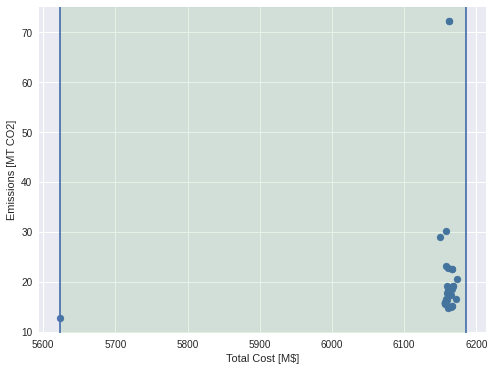

In [86]:
fig, ax = plt.subplots(figsize=(8,6))
# for c, e in zip(F_cost, F_emissions):
#     ax.scatter(e[-1], c[-1])

ax.scatter([c[-1] for c in F_cost],[e[-1] for e in F_emissions])

min_val = min([c[-1] for c in F_cost])
slack = 0.1
a = ax.axvline(x=min_val)
b = ax.axvline(x=(1+slack)*min_val)
ax.axvspan(min_val, (1+slack)*min_val, alpha=0.1, color='green')

ax.set_ylabel("Emissions [MT CO2]")
ax.set_xlabel("Total Cost [M$]")

In [114]:
scenario = 'mga'
region = 'IL'
cur = conn.cursor()
cap_dict = {}
for tech in all_techs:
        if scenario == None:
            command = (f"SELECT t_periods, capacity "
                       f"FROM Output_CapacityByPeriodAndTech "
                       f"WHERE tech IS '{tech}' "
                       f"AND regions LIKE '%{region}' "
                       f"ORDER BY Output_CapacityByPeriodAndTech.t_periods")
        else:
            command = (f"SELECT t_periods, capacity "
                       f"FROM Output_CapacityByPeriodAndTech "
                       f"WHERE tech IS '{tech}' "
                       f"AND regions LIKE '%{region}' "
                       f"AND scenario LIKE '%{scenario}' "
                       f"ORDER BY Output_CapacityByPeriodAndTech.t_periods")
        cur.execute(command)
        cap_tech = cur.fetchall()

In [115]:
cap_tech

[]

In [57]:
axes = []
frames = []
year = 2050
for j, s in enumerate(seasons):
            techs, activity = get_load_profile(conn, 'IL', s, year, 'ELC', 'base')
#             sec_colors = [elc_colors[tech] for tech in techs]
            df = pd.DataFrame(dict(zip(techs,activity)))
#             hours = np.arange(0,N_hours,1)+j*N_hours+1
            frames.append(df)
#             ax.xaxis.set_minor_locator(AutoMinorLocator())
#             d1 = ax.stackplot(hours, activity, labels=techs, colors=sec_colors, baseline='zero')
#             ax.tick_params(which='minor', length=4, color='r')
#             ax.set_ylabel(f'Generation [GWh] : {year}')
#             axes.append(d1)

In [58]:
full_df = pd.concat(frames, axis=0)
full_df.index = np.arange(0,8760,1)
full_df

,COAL_CONV,NUCLEAR_CONV,NUCLEAR_ADV,BIOMASS,NATGAS_CONV,NATGAS_ADV,WIND_FARM,SOLAR_FARM,LI_BATTERY
0,0.0,17.231410,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
1,0.0,17.231410,0.0,0.0,0.000000,0.0,0.0,0.0,0.128101
2,0.0,17.231410,0.0,0.0,0.000000,0.0,0.0,0.0,0.046125
3,0.0,17.231410,0.0,0.0,0.000000,0.0,0.0,0.0,0.059806
4,0.0,17.231410,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...
8755,0.0,17.002093,0.0,0.0,0.035945,0.0,0.0,0.0,0.535693
8756,0.0,17.002093,0.0,0.0,0.267464,0.0,0.0,0.0,0.158039
8757,0.0,17.002093,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
8758,0.0,17.002093,0.0,0.0,0.057757,0.0,0.0,0.0,0.030897


In [59]:
to_drop = []
for c in full_df.columns:
    if full_df[c].sum() <=1:
        to_drop.append(c)
non_zero_df = full_df.drop(columns=to_drop)

<AxesSubplot:>

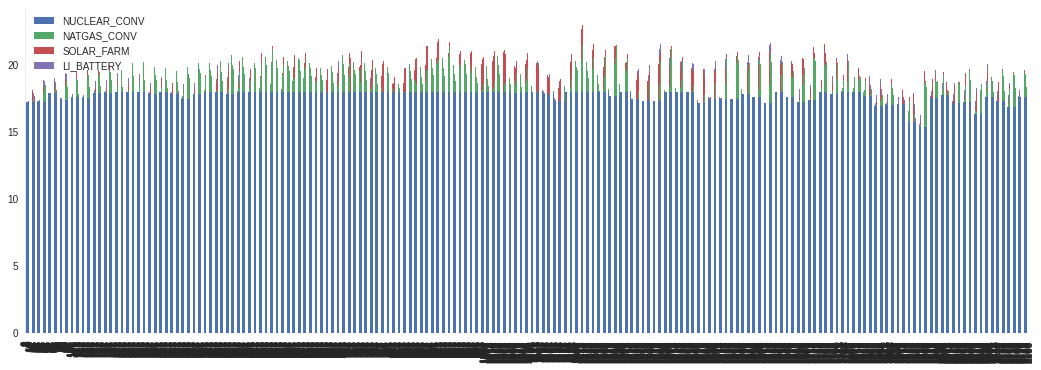

In [64]:
fig, ax = plt.subplots(figsize=(18,6))
non_zero_df[:int(8760/4)].plot(ax=ax, kind='bar', stacked=True)

In [50]:
command = "SELECT time_of_day_name, dds FROM DemandSpecificDistribution;"
curs = conn.cursor()
desc = curs.execute(command)
display(desc.description)
curs.fetchall()

(('time_of_day_name', None, None, None, None, None, None),
 ('dds', None, None, None, None, None, None))

[('H1', 0.009264342441146056),
 ('H2', 0.009116674201360147),
 ('H3', 0.009020454937178846),
 ('H4', 0.008951562836536106),
 ('H5', 0.008901309607582144),
 ('H6', 0.008963914252296477),
 ('H7', 0.009203886911640018),
 ('H8', 0.009491568418918803),
 ('H9', 0.009798106607132286),
 ('H10', 0.009971444181380785),
 ('H11', 0.010107319737868298),
 ('H12', 0.010245175100348159),
 ('H13', 0.010337389435570466),
 ('H14', 0.01047686635054726),
 ('H15', 0.010587637113511626),
 ('H16', 0.010615594823842438),
 ('H17', 0.010505046449155064),
 ('H18', 0.010319141927292063),
 ('H19', 0.010167844862777066),
 ('H20', 0.010120925190898838),
 ('H21', 0.010061396457171919),
 ('H22', 0.009928508710036905),
 ('H23', 0.009701412630168698),
 ('H24', 0.009458494414805783),
 ('H1', 0.011328829004044085),
 ('H2', 0.011183616955889776),
 ('H3', 0.011070144968289891),
 ('H4', 0.011011871819306643),
 ('H5', 0.010984364037156101),
 ('H6', 0.01105564037712525),
 ('H7', 0.01148120887388498),
 ('H8', 0.01173774507794522

In [14]:
def plot_electricity_profiles(db_conn, region, outcomm, colors=elc_colors, N_hours=24, scenario=None):
    """
    This function plots all of the load profiles
    for a particular sector.
    """

    seasons = get_seasons(db_conn)
    periods = get_periods(db_conn)
    all_techs = get_regional_techs(db_conn, outcomm, region)

    fig, ax = plt.subplots(nrows=len(periods), ncols=1, sharex=True, figsize=(10, 20))

    axes = []
    
    if len(periods) == 1:
        year = periods[0]
        for j, s in enumerate(seasons):
            techs, activity = get_load_profile(db_conn, region, s, year, outcomm, scenario)
            sec_colors = [elc_colors[tech] for tech in techs]
            hours = np.arange(0,N_hours,1)+j*N_hours+1
            ax.xaxis.set_minor_locator(AutoMinorLocator())
            d1 = ax.stackplot(hours, activity, labels=techs, colors=sec_colors, baseline='zero')
            ax.tick_params(which='minor', length=4, color='r')
            ax.set_ylabel(f'Generation [GWh] : {year}')
            axes.append(d1)
    else:
        for i,year in enumerate(periods):
    #         dmd = get_demand_value(conn, period=year, comm='CW_DEMAND', region='UIUC')
            for j, s in enumerate(seasons):
                techs, activity = get_load_profile(db_conn, region, s, year, outcomm, scenario)
                sec_colors = [elc_colors[tech] for tech in techs]
                hours = np.arange(0,N_hours,1)+j*N_hours+1
                ax[i].xaxis.set_minor_locator(AutoMinorLocator())
                d1 = ax[i].stackplot(hours, activity, labels=techs, colors=sec_colors, baseline='zero')
                ax[i].tick_params(which='minor', length=4, color='r')
                ax[i].set_ylabel(f'Generation [GWh] : {year}')
                axes.append(d1)

    fig.legend(axes, labels=techs, loc='right',bbox_to_anchor=(1.3, 0.75), fontsize=21)
#     fig.legend(axes, labels=all_techs)
    plt.subplots_adjust(right=0.9)
#     plt.legend()
    plt.show()

    return techs, activity